In [2]:
import numpy as np
import os

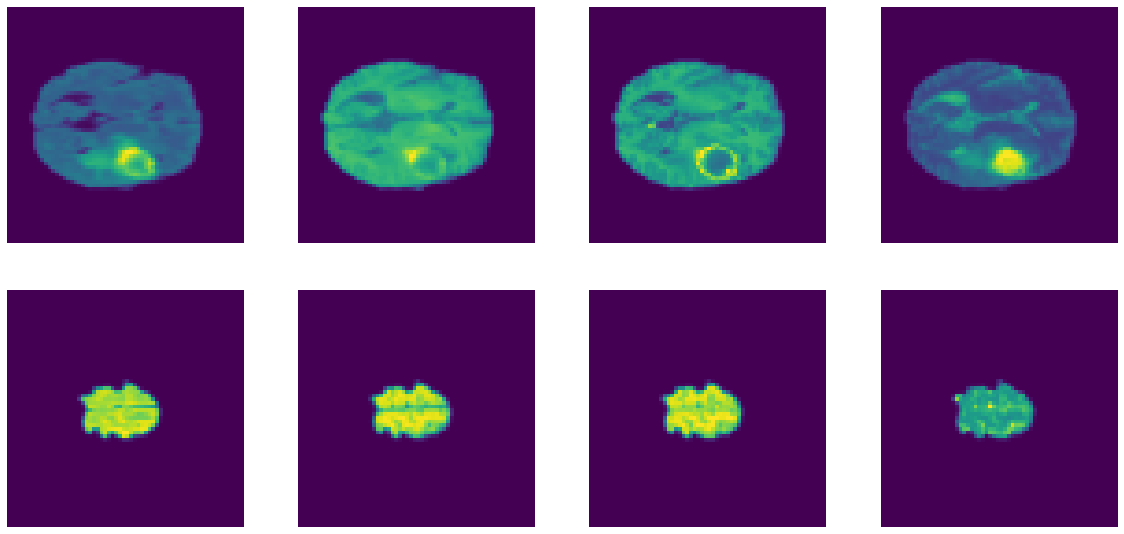

In [14]:
imgPath = os.path.join('data', 'num64train', 'BRATS_001.nii.gz.npy')
img = np.load(imgPath)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
slices = [60,120]
num_channels = img.shape[0]
k = 1
for slice in slices:
    for j in range(num_channels):
        plt.subplot(num_channels,num_channels,k)
        plt.axis('off')
        plt.imshow(img[j,:,:,slice])
        k+=1
plt.show()

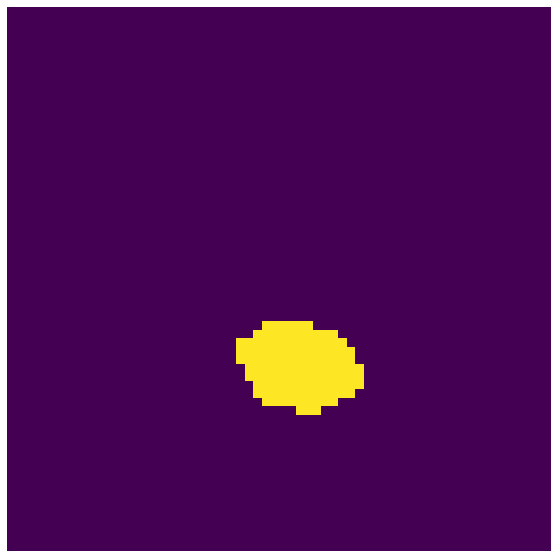

In [18]:
imgPath = os.path.join('data', 'num64labels', 'BRATS_001.nii.gz.npy')
img = np.load(imgPath)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img[:,:,50])
plt.show()

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [101]:
class Crush(nn.Module):
    def __init__(self,D=64,S=128,C=4,crush_size=32):
        super(Crush,self).__init__()
        
        self.dimensions = (C,D,D,S)
        self.in_features = int(D*D*S*C)
        self.crush = crush_size
        self.out_features = int(D*D*S)
        self.enc = nn.Linear(in_features=self.in_features,out_features=self.crush,bias=True)
        self.act = nn.ReLU()
        self.dec = nn.Linear(in_features=self.crush,out_features=self.out_features)
        self.sig = nn.Sigmoid()
    
    def forward(self, x_in, evaluating=False):
        batch_len = x_in.shape[0]
        x = x_in.view(batch_len,-1)
        x = self.enc(x)
        x = self.act(x)
        x = self.dec(x)
        
        if evaluating:
            x = self.sig(x)
            x = x.round()
        
        dummy_dim = (-1,) + self.dimensions[1:]
        x_out = x.view(dummy_dim)
        return x_out

In [102]:
model = Crush()

In [103]:
x = torch.randn(1,64,64,128,4)
x.shape

torch.Size([1, 64, 64, 128, 4])

In [104]:
y = model(x, evaluating=True)

In [105]:
y.shape

torch.Size([1, 64, 64, 128])

In [106]:
y = y.round()
z = y[0].cpu().detach().numpy()
print(z.shape, z.dtype)

(64, 64, 128) float32


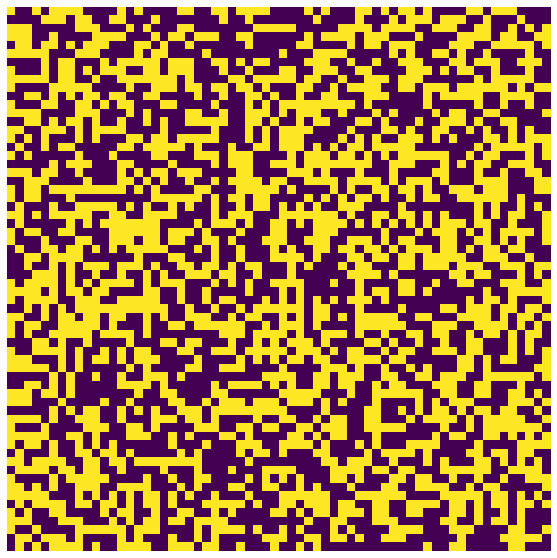

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(z[:,:,50])
plt.show()